<a href="https://colab.research.google.com/github/ads-ayaz/ml-playbook/blob/master/20200611_Music_classification_SCRATCH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><strong>Machine Learning Playbook</strong> | Aluance Digital</h1>

Machine learning projects have a lot of steps and stages to them. Executing a successful project can be made a whole lot easier when you have a framework that organizes the whole approach.

That's why Aluance developed this "playbook" it simultaneously acts as a machine learning project template and a collection of best practices. The playbook is continually updated, and can be forked whenever a new project is initiated.

# How to use this playbook

# Problem statement

# Libraries

Install or upgrade missing libraries.

In [1]:
# To determine which version you're using:
!pip show tensorflow

# For the current version: 
#!pip install --upgrade tensorflow

!pip show Keras
#!pip install --upgrade Keras

Name: tensorflow
Version: 2.2.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: opt-einsum, h5py, termcolor, numpy, google-pasta, absl-py, keras-preprocessing, gast, protobuf, tensorboard, wheel, scipy, six, tensorflow-estimator, wrapt, grpcio, astunparse
Required-by: fancyimpute
Name: Keras
Version: 2.3.1
Summary: Deep Learning for humans
Home-page: https://github.com/keras-team/keras
Author: Francois Chollet
Author-email: francois.chollet@gmail.com
License: MIT
Location: /usr/local/lib/python3.6/dist-packages
Requires: numpy, pyyaml, h5py, keras-applications, keras-preprocessing, six, scipy
Required-by: textgenrnn, keras-vis, kapre, fancyimpute


Import the libraries needed for this project.

In [2]:
import os

import numpy as np
import pandas as pd

import keras
from keras.layers import Dense             # Dense describes how the layers are connected
from keras.models import Sequential        # Sequential means we are creating a sequence of connectec layers
from keras.optimizers import SGD           # Sochastic gradient descent is the method used to find local minimum
#from tensorflow.keras.optimizers.schedules import ExponentialDecay    # Used for schedules.ExponentialDecay

import matplotlib.pyplot as plt            # visualize images

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import tensorflow as tf

Using TensorFlow backend.


# Data preparation

## Acquisition

After uploading the source data file, use the following commands to unzip the contents into the `data` folder.


In [0]:
# Uncomment the lines below to execute.
#!unzip /content/drive/My\ Drive/_ml/_datasets/GTZAN\ dataset\ -\ 568973_1032238_bundle_archive.zip -d /content/data

## Unpacking the data

The GTZAN data set includes a folder called `genres_original` that categorizes 30 second music samples in folders labeled by genre. Each sample is a `.wav` file, whose filename follows the format `<genre_label>.<num_id>.wav`. The collection comprises 10 genres folders each containing 100 audio files.

The `images_original` folder contains a Mel Spectogram image in `.png` format for each music sample. Each spectogram provides a visual representation for one of the audio files. The files are organized into folders by genre and the file naming convention is `<genre_label><num_id>.png`, where the num_ids match those of the corresponding  music sample audio files.

The data set also comes with two `.csv` files that list features for the music samples in either their full 30 second format (`features_30_sec.csv`) or in 3 second segments (`features_3_sec.csv`). Breaking the samples up effectively tripples the available data samples to 3,000.

Here are the fields that each of the `.csv` files contain:

| Field | Format | Description | Notes |
| --- | --- | --- | --- |
| filename | string | Name of the music sample `.wav` file.|Segments in the `3_sec` file denoted<br/> as `<fname>.<segment>.wav`. |
| length | int | Size of the file in bytes | [CHECK] |
| chroma_stft_mean<br/>chroma_stft_var | float | The mean and variance of the _chroma_ of the audio sample. | See: [Wikipedia](https://en.wikipedia.org/wiki/Chroma_feature)|
| rms_mean<br/>rms_var | float |||
| spectral_centroid_mean<br/>spectral_centroid_var | float |||
| spectral_bandwidth_mean<br/>spectral_bandwidth_var | float |||
| rolloff_mean<br/>rolloff_var | float |||
| zero_crossing_rate_mean<br/>zero_crossing_rate_var | float |||
| harmony_mean<br/>harmony_var | float |||
| perceptr_mean<br/>perceptr_var | float |||
| tempo | float | The _tempo_ or speed of the beat in BPM. ||
| mfcc00_var<br/>mfcc00_mean | float | Mean and variance of **mel-frequency cepstral coefficients**. | See: [Wikipedia](https://en.wikipedia.org/wiki/Mel-frequency_cepstrum) |
| label | string | Musical genre of the sample. ||


## Import

In [0]:
FOLDER_pwd = os.getcwd()
FOLDER_data_root = "data/"
FOLDER_csv = FOLDER_data_root + "Data/"

FILE_features30 = "features_30_sec.csv"
FILE_features3 = "features_3_sec.csv"

In [0]:
# Import using NumPy
# raw_data = np.genfromtxt(FOLDER_csv + FILE_features30, delimiter=',')
# raw_data = raw_data[1:, 2:]
# np.shape(raw_data)

In [0]:
# Import using Pandas
df_raw = pd.read_csv(FOLDER_csv + FILE_features30)

# Create X as matrix of [n_features, m_examples], dropping some cols
df_X_raw = df_raw.drop(['filename', 'length', 'label'], axis=1)

# Create Y as matrix of [1, m] labels
df_Y_raw = pd.DataFrame(df_raw['label'])
#Y_raw = np.reshape(np.array(df_raw['label']), (np.shape(X_raw)[0], 1))

# Shuffle X, Y
df_X, df_Y = shuffle(df_X_raw, df_Y_raw)

In [7]:
df_X

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
723,0.393456,0.095185,0.210817,0.007254,3758.647453,1.460349e+06,3293.503937,179924.365617,7853.715412,3.225277e+06,0.177561,0.010057,1.407944e-06,0.015856,-0.000101,0.021228,103.359375,-44.237698,4667.605957,51.353153,982.319885,24.982996,728.473206,12.159593,385.409973,10.874250,177.306381,7.613763,198.092514,8.213783,132.994537,-0.759989,103.267181,5.952502,122.356804,4.756770,90.301605,-2.507542,70.644058,1.324472,71.292839,-1.957549,69.426262,-0.456011,58.115292,0.236963,57.809673,-2.001880,64.561363,-1.966624,68.404198,-1.035476,68.450081,0.521438,56.259830,-0.377610,92.051102
471,0.403845,0.099548,0.247032,0.008198,3184.921787,1.336675e+06,3285.422460,115986.367896,7471.147166,2.272039e+06,0.107511,0.009958,-6.574594e-07,0.039275,-0.000163,0.013127,95.703125,-78.819771,3218.545898,51.530029,1040.440918,42.267738,299.545380,30.088554,241.155640,20.084763,225.848083,6.969689,109.306068,8.027858,115.698692,6.881748,121.014885,-4.623488,112.174187,3.663356,98.125450,3.634636,90.500443,4.333865,70.354431,2.605772,72.926140,0.761683,69.050369,-9.158778,68.649925,-2.163452,50.640205,-2.679224,54.457802,-5.529989,33.797115,-1.328599,32.061016,-2.477071,34.385494
956,0.488327,0.072437,0.175750,0.002050,3303.162310,4.613148e+05,2913.586172,77322.772148,6717.201945,1.251586e+06,0.177533,0.004664,1.434830e-04,0.013740,0.002380,0.007593,135.999178,-7.846319,1578.752930,59.529739,340.882874,3.647023,230.159729,28.992725,97.259422,4.147532,70.677315,10.272942,44.824116,2.554184,75.550003,7.595525,38.706879,-1.404189,39.589066,2.967205,43.797783,4.057471,36.889427,-0.747674,31.860336,1.066255,28.230644,-3.047848,24.549204,-1.013652,43.443981,-0.693758,29.216442,-0.681638,26.359278,1.524251,24.035576,-0.455842,26.617897,0.505033,25.160053
968,0.401931,0.082724,0.091213,0.000554,2467.284654,2.824928e+05,2399.022704,44680.822416,5402.860524,7.896660e+05,0.118275,0.002549,-1.510896e-03,0.004620,-0.002149,0.001898,123.046875,-121.094696,1688.805664,91.731079,414.800598,-14.718758,243.078278,52.959843,83.926407,-11.411079,73.589119,31.013081,91.644516,-17.487844,62.793236,24.189877,71.165848,-24.778721,75.783257,17.113907,59.456768,-15.878265,52.452339,10.379856,49.631775,-8.625669,38.654865,7.147680,43.124485,-11.835875,36.092770,3.169227,31.910709,-10.361743,31.489822,1.505117,33.656353,-10.361339,40.228825,-2.480384,31.079451
390,0.485229,0.076683,0.090661,0.002879,2574.454343,4.329060e+05,2396.480081,95966.324238,5458.450494,1.468582e+06,0.146114,0.004204,4.288645e-06,0.002570,0.000053,0.005762,129.199219,-125.637733,1863.019775,88.535866,583.760925,-16.749247,353.307709,42.787514,206.633942,-9.902900,120.206764,29.152266,102.768456,-19.360279,92.861015,20.458952,68.858864,-16.478580,65.399033,15.016833,55.853935,-8.755143,53.490120,12.770605,45.578686,-7.753715,41.017509,7.039320,42.877178,-8.515849,33.040672,3.272150,32.648281,-6.473699,43.241314,5.798188,31.986368,-3.494546,35.222599,-0.060173,35.280766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,0.485227,0.086623,0.115639,0.003476,2908.392061,1.492491e+06,2990.066467,268903.685905,6346.674306,4

In [0]:
# Normalize X

def normalize(X) :
  epsilon = np.power([10.0], -7)
  n, m = np.shape(X)
  mu = (1 / m) * np.mean(X)
  sigma_sq = (1 / m) * np.sum(np.power(X, 2))
  X = (X - mu) / (sigma_sq + epsilon)
  return X

df_X = normalize(df_X)

In [9]:
df_X

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
723,0.146921,0.710537,0.554044,18.230495,0.000040,2.171477e-07,0.000035,3.602841e-07,0.000019,3.351411e-08,0.802499,31.585282,0.150107,3.042711,-4.028254,16.194620,0.000383,-0.000077,0.000012,0.000260,0.000080,0.002607,0.000136,0.000412,0.000350,0.004125,0.000245,0.001184,0.000535,0.003786,0.000440,-0.000252,0.000613,0.002948,0.000732,0.002147,0.000631,-0.001656,0.000552,0.001092,0.000691,-0.001750,0.000682,-0.000984,0.000604,0.000449,0.000634,-0.005177,0.000750,-0.002970,0.000761,-0.003913,0.000732,0.001642,0.000545,-0.001284,0.000744
471,0.150867,0.743629,0.650268,20.621235,0.000033,1.986537e-07,0.000035,2.305189e-07,0.000018,2.350855e-08,0.482629,31.271601,0.110501,7.599769,-6.696461,9.985361,0.000354,-0.000141,0.000008,0.000261,0.000085,0.004400,0.000055,0.001053,0.000218,0.007613,0.000313,0.001080,0.000292,0.003701,0.000382,0.001805,0.000720,-0.002184,0.000671,0.001639,0.000686,0.002579,0.000710,0.003729,0.000682,0.002512,0.000717,0.001475,0.000720,-0.013390,0.000755,-0.005590,0.000585,-0.004086,0.000603,-0.020753,0.000355,-0.003761,0.000305,-0.008807,0.000271
956,0.182956,0.537981,0.460870,5.054512,0.000035,6.775261e-08,0.000031,1.520493e-07,0.000016,1.279749e-08,0.802371,14.559599,2.874558,2.630847,102.172301,5.743843,0.000506,-0.000010,0.000004,0.000302,0.000027,0.000394,0.000042,0.001014,0.000086,0.001578,0.000095,0.001612,0.000116,0.001206,0.000247,0.001997,0.000224,-0.000622,0.000231,0.001316,0.000301,0.002870,0.000283,-0.000724,0.000302,0.001074,0.000270,-0.006216,0.000248,-0.001393,0.000473,-0.001828,0.000332,-0.000958,0.000286,0.005678,0.000249,-0.001212,0.000252,0.001878,0.000196
968,0.150141,0.616009,0.236252,1.266652,0.000026,4.101163e-08,0.000025,8.580097e-08,0.000013,7.949003e-09,0.531779,7.880793,-28.850042,0.856181,-91.708342,1.378693,0.000457,-0.000219,0.000004,0.000471,0.000033,-0.001510,0.000044,0.001870,0.000073,-0.004314,0.000099,0.004950,0.000244,-0.007932,0.000204,0.006463,0.000419,-0.011964,0.000450,0.007888,0.000412,-0.010874,0.000407,0.009026,0.000478,-0.007977,0.000374,0.014367,0.000445,-0.017333,0.000391,0.008062,0.000364,-0.016113,0.000344,0.005606,0.000354,-0.030142,0.000386,-0.008819,0.000244
390,0.181779,0.570187,0.234786,7.152555,0.000027,6.350436e-08,0.000025,1.898873e-07,0.000013,1.507517e-08,0.658898,13.105187,0.205348,0.457326,2.580630,4.340502,0.000480,-0.000227,0.000005,0.000454,0.000047,-0.001721,0.000065,0.001507,0.000186,-0.003742,0.000165,0.004650,0.000275,-0.008786,0.000305,0.005459,0.000405,-0.007936,0.000387,0.006914,0.000386,-0.005963,0.000415,0.011121,0.000438,-0.007163,0.000398,0.014148,0.000442,-0.012443,0.000357,0.008326,0.000373,-0.010026,0.000476,0.021692,0.000336,-0.010087,0.000337,-0.000147,0.000279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,0.181778,0.645588,0.301152,8.665367,0.000031,2.219543e-07,0.000032,5.408718e-07,0.000015,4.703621e-08,0.453732,17.246831,0.199695,1.059948,-0.153840,4.962186,0.000417,-0.000283,0.000017,0.000308,0.000101,0.002422,0.000267,0.001093,0.000290,0.009502,0.000365,0.002681,0.000410,0.004343,0.000386,0.002228,0.000718,0.002644,0.000568,0.002983,0.0

In [0]:
# Construct a dictionary from all the possible labels in Y
dictLabels = dict(map(reversed, enumerate(list(set(df_Y_raw['label'])))))

In [0]:
# Split the dataset into train, dev and test sets
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.4, shuffle=False)
X_dev, X_test, y_dev, y_test = train_test_split(X_test, y_test, test_size=0.5, shuffle=False)

# One-hot encode the y sets
s = pd.Series(dictLabels)
y_train = keras.utils.to_categorical(s[y_train['label']])
y_dev = keras.utils.to_categorical(s[y_dev['label']])
y_test = keras.utils.to_categorical(s[y_test['label']])

# Transpose all the sets
# X_train = X_train.T
# X_dev = X_dev.T
# X_test = X_test.T
# y_train = y_train.T
# y_dev = y_dev.T
# y_test = y_test.T


# Model

In [0]:
# Get the shape of the data
m_train, n = np.shape(X_train)
m_dev, _ = np.shape(X_dev)
m_test, _ = np.shape(X_test)

In [13]:
X_train

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
723,0.146921,0.710537,0.554044,18.230495,0.000040,2.171477e-07,0.000035,3.602841e-07,0.000019,3.351411e-08,0.802499,31.585282,0.150107,3.042711,-4.028254,16.194620,0.000383,-0.000077,0.000012,0.000260,0.000080,0.002607,0.000136,0.000412,0.000350,0.004125,0.000245,0.001184,0.000535,0.003786,0.000440,-0.000252,0.000613,0.002948,0.000732,0.002147,0.000631,-0.001656,0.000552,0.001092,0.000691,-0.001750,0.000682,-0.000984,0.000604,0.000449,0.000634,-0.005177,0.000750,-0.002970,0.000761,-0.003913,0.000732,0.001642,0.000545,-0.001284,0.000744
471,0.150867,0.743629,0.650268,20.621235,0.000033,1.986537e-07,0.000035,2.305189e-07,0.000018,2.350855e-08,0.482629,31.271601,0.110501,7.599769,-6.696461,9.985361,0.000354,-0.000141,0.000008,0.000261,0.000085,0.004400,0.000055,0.001053,0.000218,0.007613,0.000313,0.001080,0.000292,0.003701,0.000382,0.001805,0.000720,-0.002184,0.000671,0.001639,0.000686,0.002579,0.000710,0.003729,0.000682,0.002512,0.000717,0.001475,0.000720,-0.013390,0.000755,-0.005590,0.000585,-0.004086,0.000603,-0.020753,0.000355,-0.003761,0.000305,-0.008807,0.000271
956,0.182956,0.537981,0.460870,5.054512,0.000035,6.775261e-08,0.000031,1.520493e-07,0.000016,1.279749e-08,0.802371,14.559599,2.874558,2.630847,102.172301,5.743843,0.000506,-0.000010,0.000004,0.000302,0.000027,0.000394,0.000042,0.001014,0.000086,0.001578,0.000095,0.001612,0.000116,0.001206,0.000247,0.001997,0.000224,-0.000622,0.000231,0.001316,0.000301,0.002870,0.000283,-0.000724,0.000302,0.001074,0.000270,-0.006216,0.000248,-0.001393,0.000473,-0.001828,0.000332,-0.000958,0.000286,0.005678,0.000249,-0.001212,0.000252,0.001878,0.000196
968,0.150141,0.616009,0.236252,1.266652,0.000026,4.101163e-08,0.000025,8.580097e-08,0.000013,7.949003e-09,0.531779,7.880793,-28.850042,0.856181,-91.708342,1.378693,0.000457,-0.000219,0.000004,0.000471,0.000033,-0.001510,0.000044,0.001870,0.000073,-0.004314,0.000099,0.004950,0.000244,-0.007932,0.000204,0.006463,0.000419,-0.011964,0.000450,0.007888,0.000412,-0.010874,0.000407,0.009026,0.000478,-0.007977,0.000374,0.014367,0.000445,-0.017333,0.000391,0.008062,0.000364,-0.016113,0.000344,0.005606,0.000354,-0.030142,0.000386,-0.008819,0.000244
390,0.181779,0.570187,0.234786,7.152555,0.000027,6.350436e-08,0.000025,1.898873e-07,0.000013,1.507517e-08,0.658898,13.105187,0.205348,0.457326,2.580630,4.340502,0.000480,-0.000227,0.000005,0.000454,0.000047,-0.001721,0.000065,0.001507,0.000186,-0.003742,0.000165,0.004650,0.000275,-0.008786,0.000305,0.005459,0.000405,-0.007936,0.000387,0.006914,0.000386,-0.005963,0.000415,0.011121,0.000438,-0.007163,0.000398,0.014148,0.000442,-0.012443,0.000357,0.008326,0.000373,-0.010026,0.000476,0.021692,0.000336,-0.010087,0.000337,-0.000147,0.000279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,0.186731,0.636587,0.573157,48.810095,0.000032,1.700932e-07,0.000032,3.876928e-07,0.000016,3.621794e-08,0.571030,30.559272,0.110157,6.929231,4.014671,10.435935,0.000354,-0.000133,0.000009,0.000298,0.000064,0.001045,0.000126,0.000748,0.000266,0.005710,0.000378,0.000753,0.000473,0.001082,0.000642,0.001424,0.000954,0.001575,0.000841,0.000218,0.

In [0]:
# Nodes per layer
n_layer = [n, 128, 128, 128, 10]

# Set up a decaying learning rate
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=False)

# Hyperparamerters
hparams = {}
hparams["alpha"] = lr_schedule #0.0001              # Learning rate
hparams["batch_size"] = 32              # Mini-batch size
hparams["epochs"] = 1000                 # Training epochs
hparams["L"] = len(n_layer)             # Number of layers in the model
hparams["momentum"] = 0.9             # momentum for SGD
hparams["nesterov"] = True           # use Nesterov momentum?

In [15]:
model = Sequential()
model.add(Dense(input_shape=(n_layer[0],),activation='relu',units=n_layer[0]))
for l in range(1, (hparams["L"] - 1)):
  model.add(Dense(activation='relu',units=n_layer[l]))
model.add(Dense(activation='softmax',units=n_layer[hparams["L"] - 1]))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 57)                3306      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               7424      
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 45,044
Trainable params: 45,044
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.SGD(
        learning_rate=hparams["alpha"], 
        momentum=hparams["momentum"], 
        nesterov=hparams["nesterov"]), 
    loss='categorical_crossentropy',
    metrics=['accuracy'])

# Training

In [17]:
history = model.fit(X_train,y_train,batch_size=hparams["batch_size"],epochs=hparams["epochs"],verbose=1)

Epoch 1/1000
600/600 [==============================] - 0s 597us/step - loss: 2.5727 - accuracy: 0.0900
Epoch 2/1000
600/600 [==============================] - 0s 71us/step - loss: 2.1655 - accuracy: 0.1450
Epoch 3/1000
600/600 [==============================] - 0s 82us/step - loss: 2.0856 - accuracy: 0.1717
Epoch 4/1000
600/600 [==============================] - 0s 77us/step - loss: 2.0452 - accuracy: 0.1917
Epoch 5/1000
600/600 [==============================] - 0s 90us/step - loss: 2.0035 - accuracy: 0.2183
Epoch 6/1000
600/600 [==============================] - 0s 76us/step - loss: 1.9844 - accuracy: 0.2250
Epoch 7/1000
600/600 [==============================] - 0s 73us/step - loss: 1.9531 - accuracy: 0.2450
Epoch 8/1000
600/600 [==============================] - 0s 97us/step - loss: 1.9301 - accuracy: 0.2583
Epoch 9/1000
600/600 [==============================] - 0s 87us/step - loss: 1.9265 - accuracy: 0.2983
Epoch 10/1000
600/600 [==============================] - 0s 70us/step - 

# Tuning

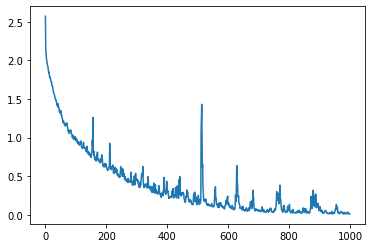

In [18]:
plt.plot(history.history['loss'])

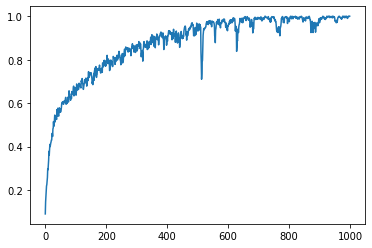

In [19]:
plt.plot(history.history['accuracy'])

#Testing

# Error Analysis

# Insights